In [2]:
# Setup code for the notebook
%matplotlib notebook
# Autoreload external python modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

from ipytools import display_imshow
from ipytools import readGTIFF  

# Testdata from s2p

<IPython.core.display.Javascript object>


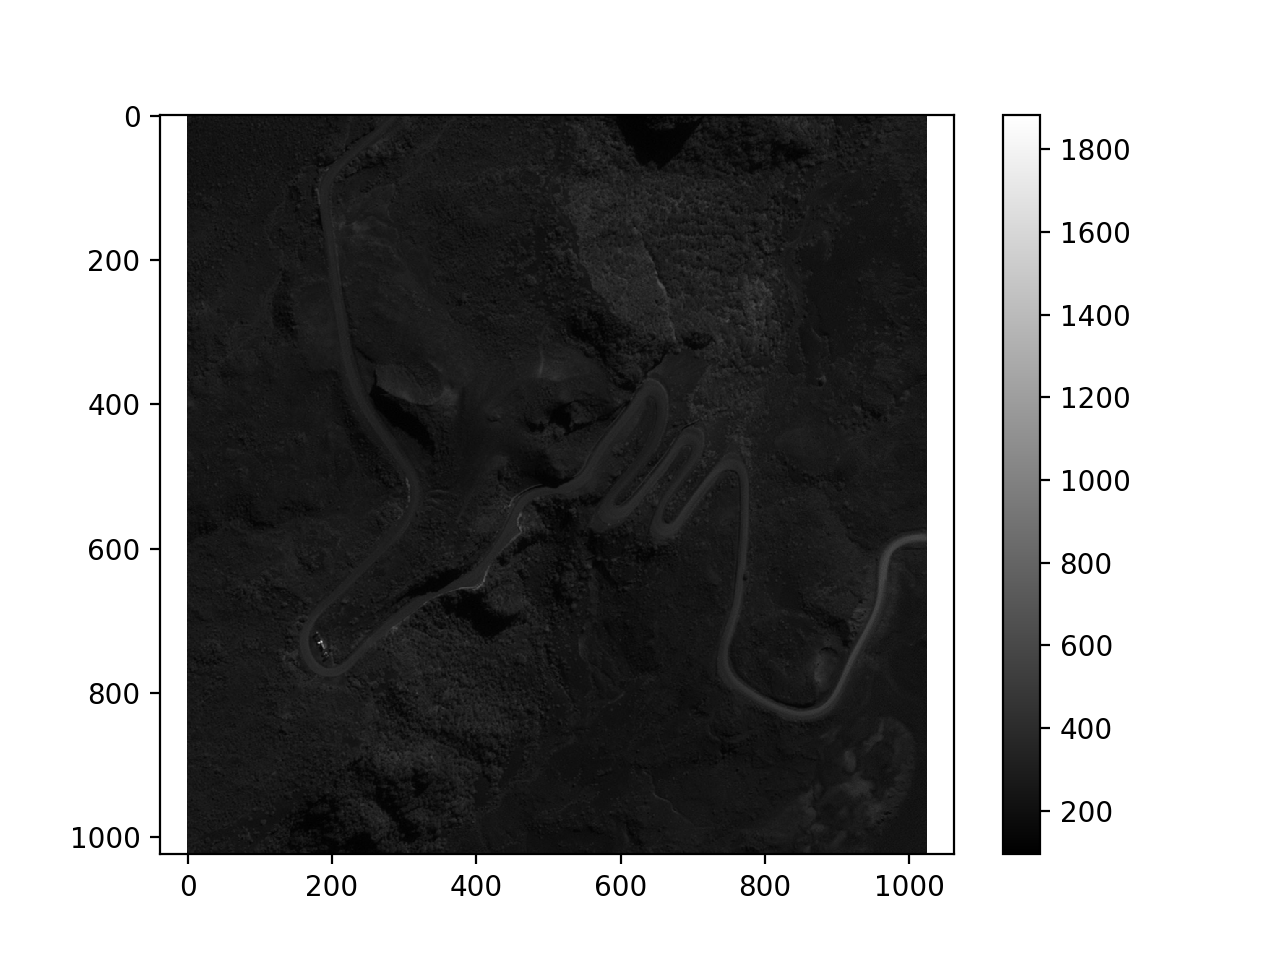

In [3]:
filename_1 = '../testdata/input_pair/img_01.tif'
a = readGTIFF(filename_1)
display_imshow(a)

<IPython.core.display.Javascript object>


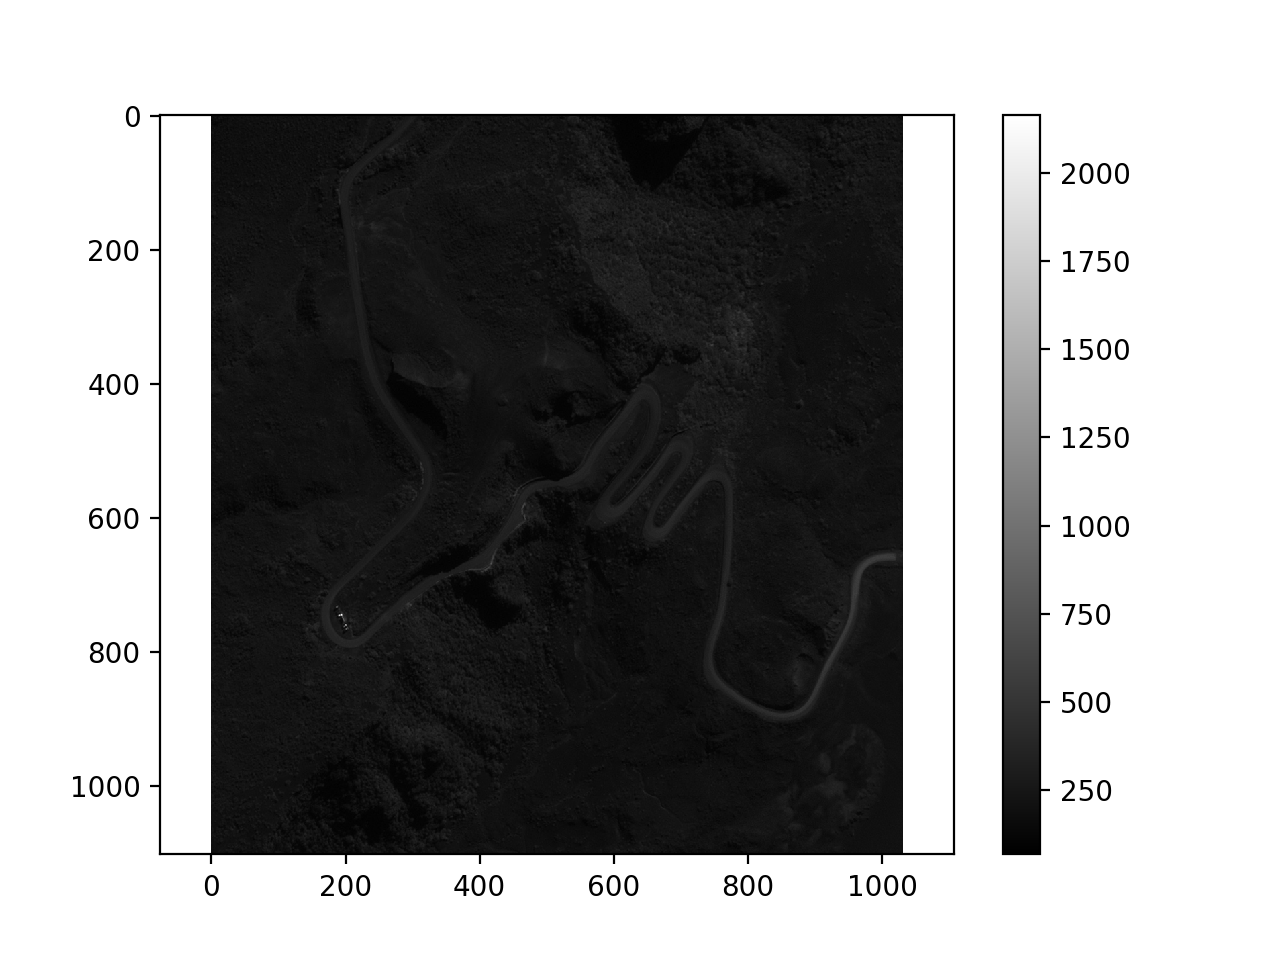

In [4]:
filename_2 = '../testdata/input_pair/img_02.tif'
a = readGTIFF(filename_2)
display_imshow(a)

<IPython.core.display.Javascript object>


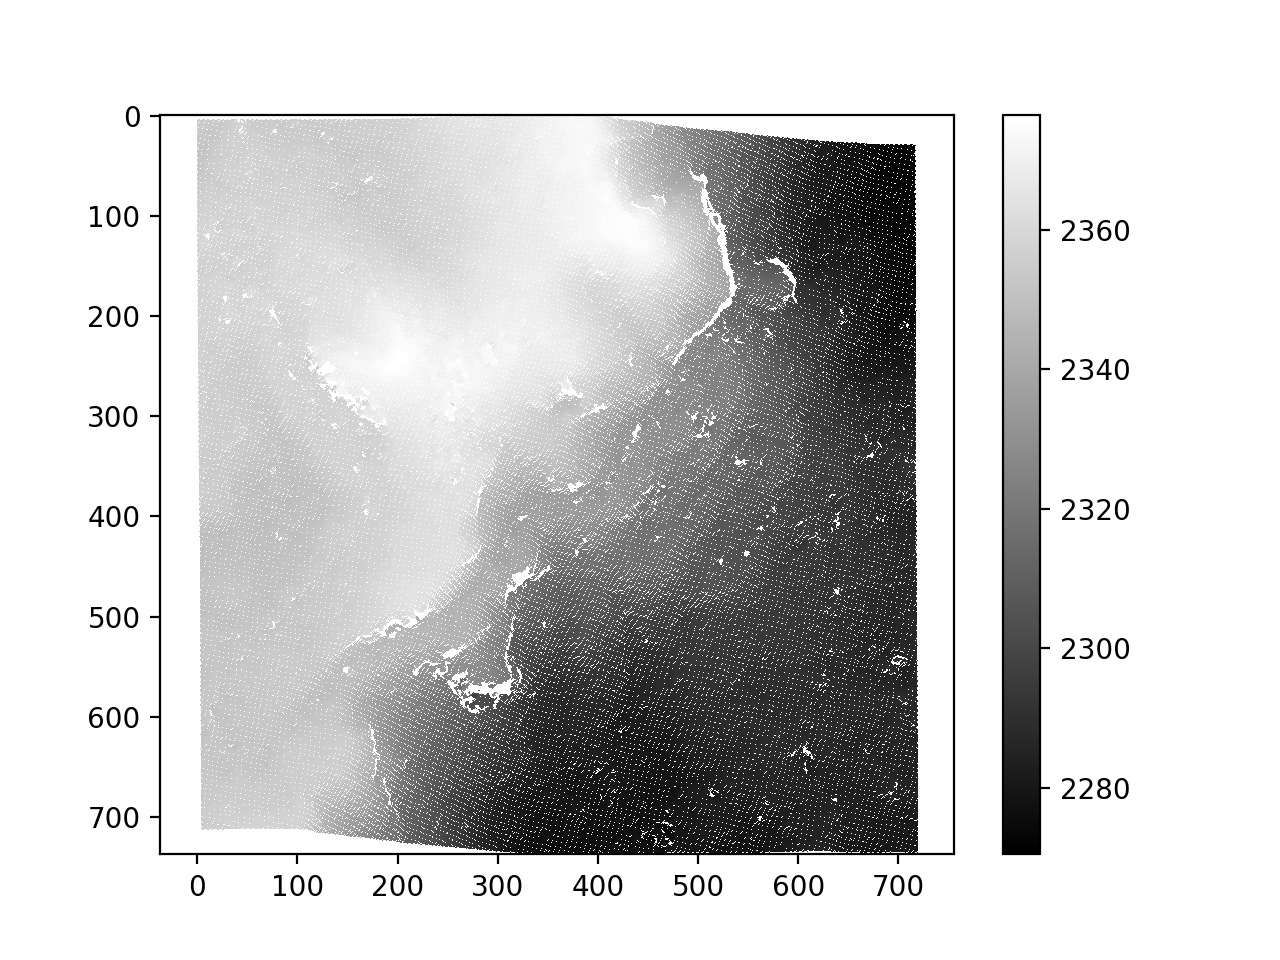

In [5]:
output = '../testoutput/output_pair/dsm.tif'
a = readGTIFF(output)
display_imshow(a)

<IPython.core.display.Javascript object>


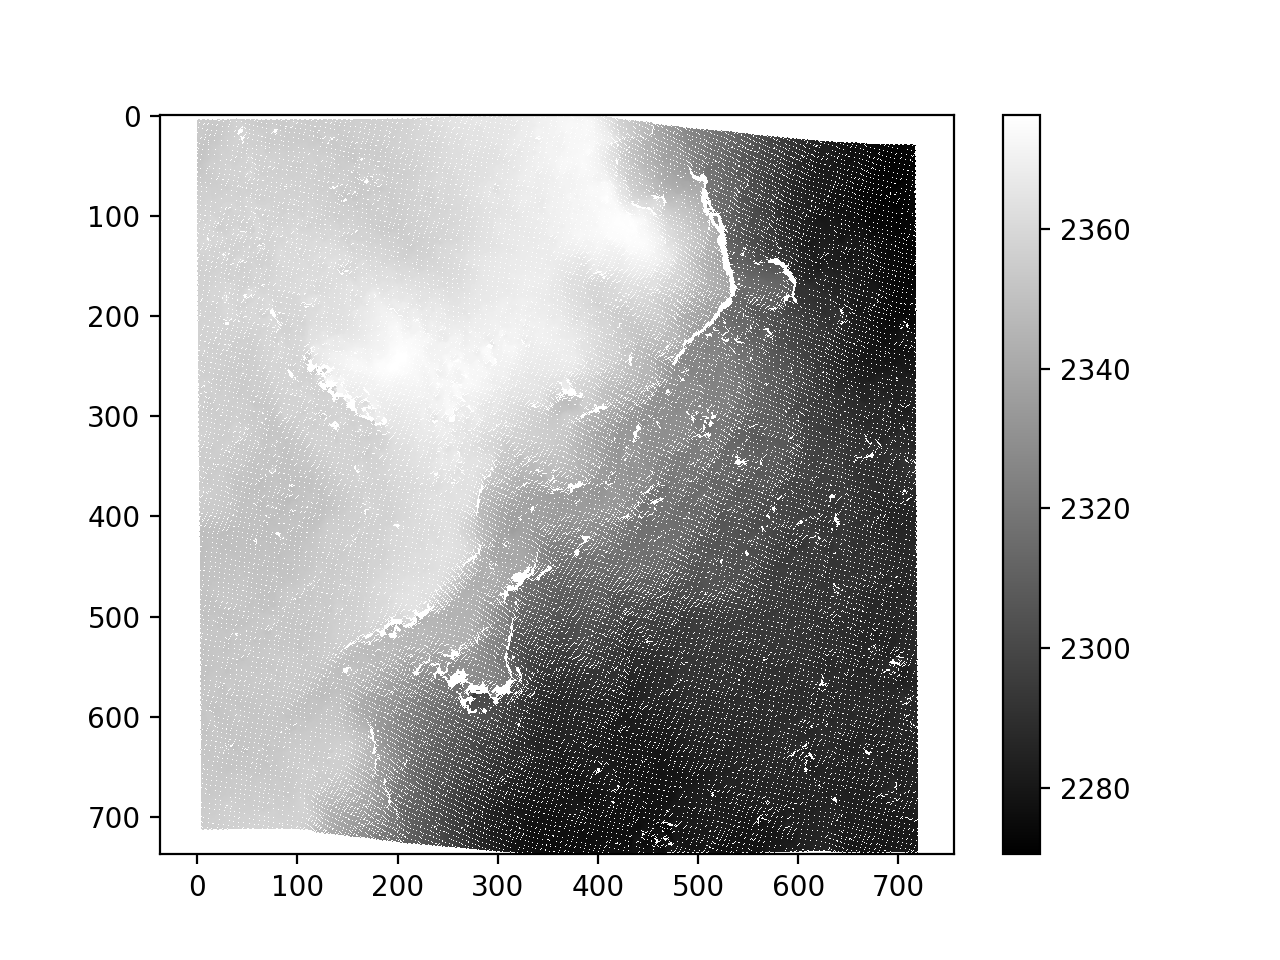

In [6]:
expected_output = '../testdata/expected_output/pair/dsm.tif'
a = readGTIFF(expected_output)
display_imshow(a)

# Data from Planet


In [7]:
def simple_equalization_8bit(im, percentiles=5):
    ''' im is a numpy array
        returns a numpy array
    '''
    import numpy as np
    mi, ma = np.nanpercentile(im.flatten(), (percentiles,100-percentiles))
    im = np.minimum(np.maximum(im,mi), ma) # clip
    im = (im-mi)/(ma-mi)*255.0   # scale
    im=im.astype(np.uint8)
    return im

In [18]:
import os
import copy
from ipytools import readGTIFF, writeGTIFF, readGTIFFmeta, display_gallery

In [19]:
def get_files(folder):
    """  Get all TIFF in the folder """
    tiff_list = []
    for dirname, dirnames, filenames in os.walk(folder):
        # print path to all filenames.
        for filename in filenames:
            if  filename.endswith('.tif'):
                complete_filename = os.path.join(dirname, filename)
                tiff_list.append(complete_filename)
    return tiff_list

In [20]:
def retrieve_triplets():
    folders = {'1107':[], '1148':[], '1231':[]}
    min_len = float('inf')
    for f in folders:
        folder = '../data/s03_20161003T16' + f + 'Z/panchromatic/'
        folders[f] = sorted(get_files(folder))
        len_f = len(folders[f])
        if (len_f < min_len):
            min_len = len_f
    return folders, min_len

In [21]:
def display_triplets(i, folders, roi=None):
    l = []
    g = []
    for f in folders:
        im_name = folders[f][i]
        g.append(im_name)
        im = readGTIFF(im_name)
        if (roi != None):
            x, y, w, h = roi["x"], roi["y"], roi["w"], roi["h"]
            im = im[x:x+w, y:y+h]
        print('Dimension: ', im.shape)
        l.append(simple_equalization_8bit(im))
    display_gallery(l, g)

In [22]:
folders, min_len = retrieve_triplets()

In [23]:
min_len

54

In [24]:
i = 0

In [25]:
roi = {
    "x": 0,
    "y": 0,
    "w": 500,
    "h": 1000
  }

Dimension:  (500, 1000, 1)
Dimension:  (500, 1000, 1)
Dimension:  (500, 1000, 1)



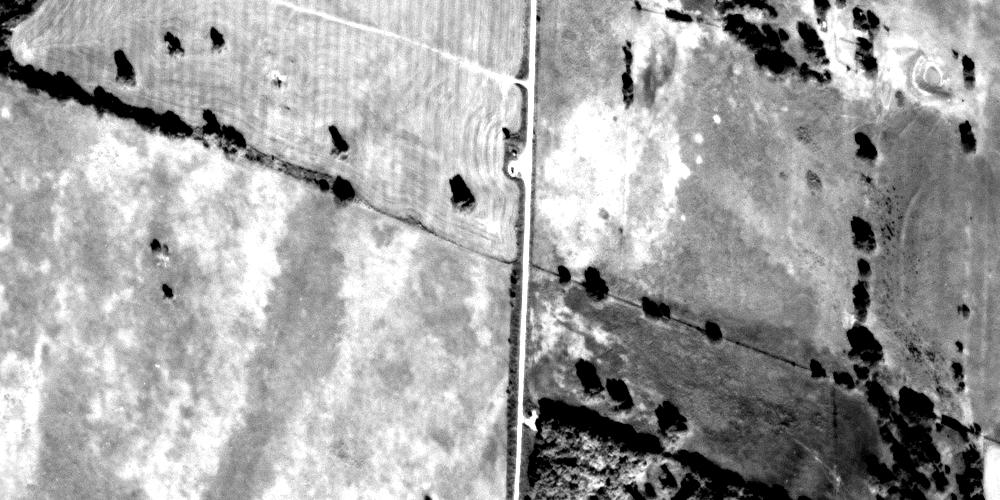
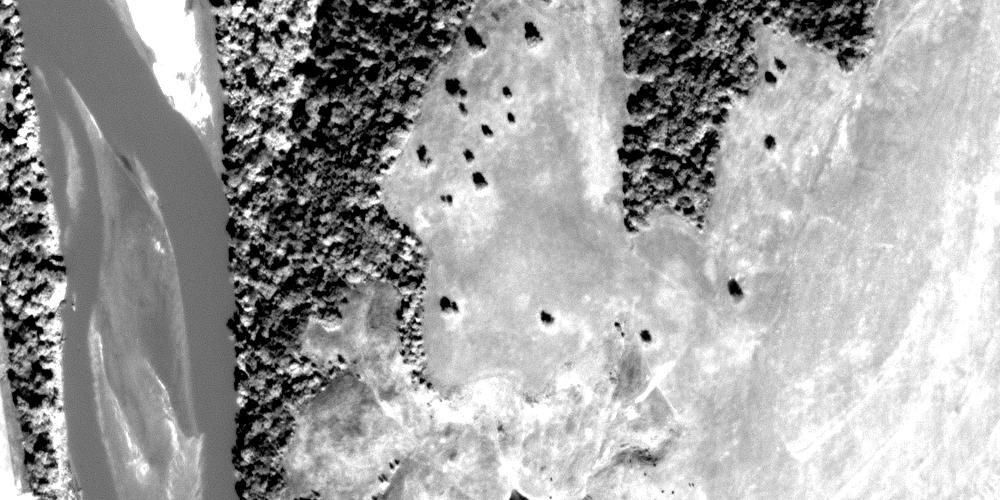
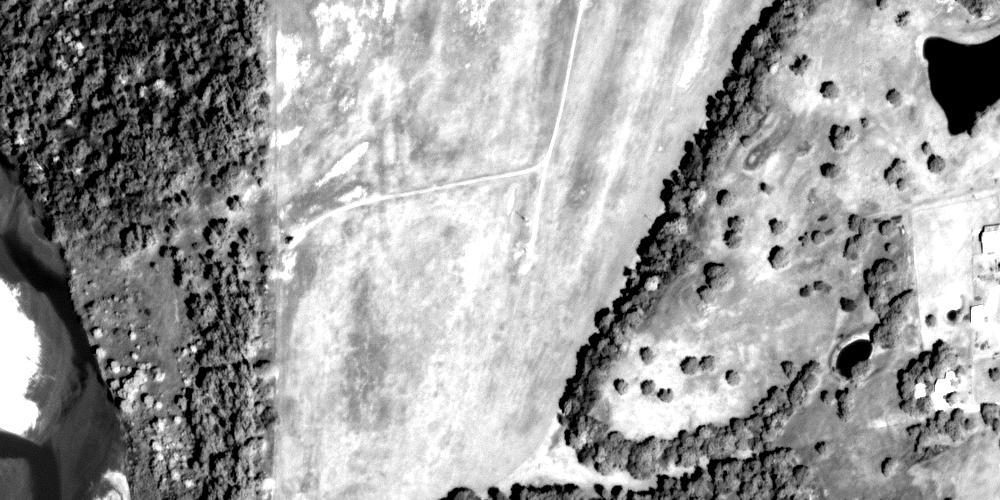

In [26]:
display_triplets(i, folders, roi)

Dimension:  (1349, 3199, 1)
Dimension:  (1349, 3199, 1)
Dimension:  (1349, 3199, 1)



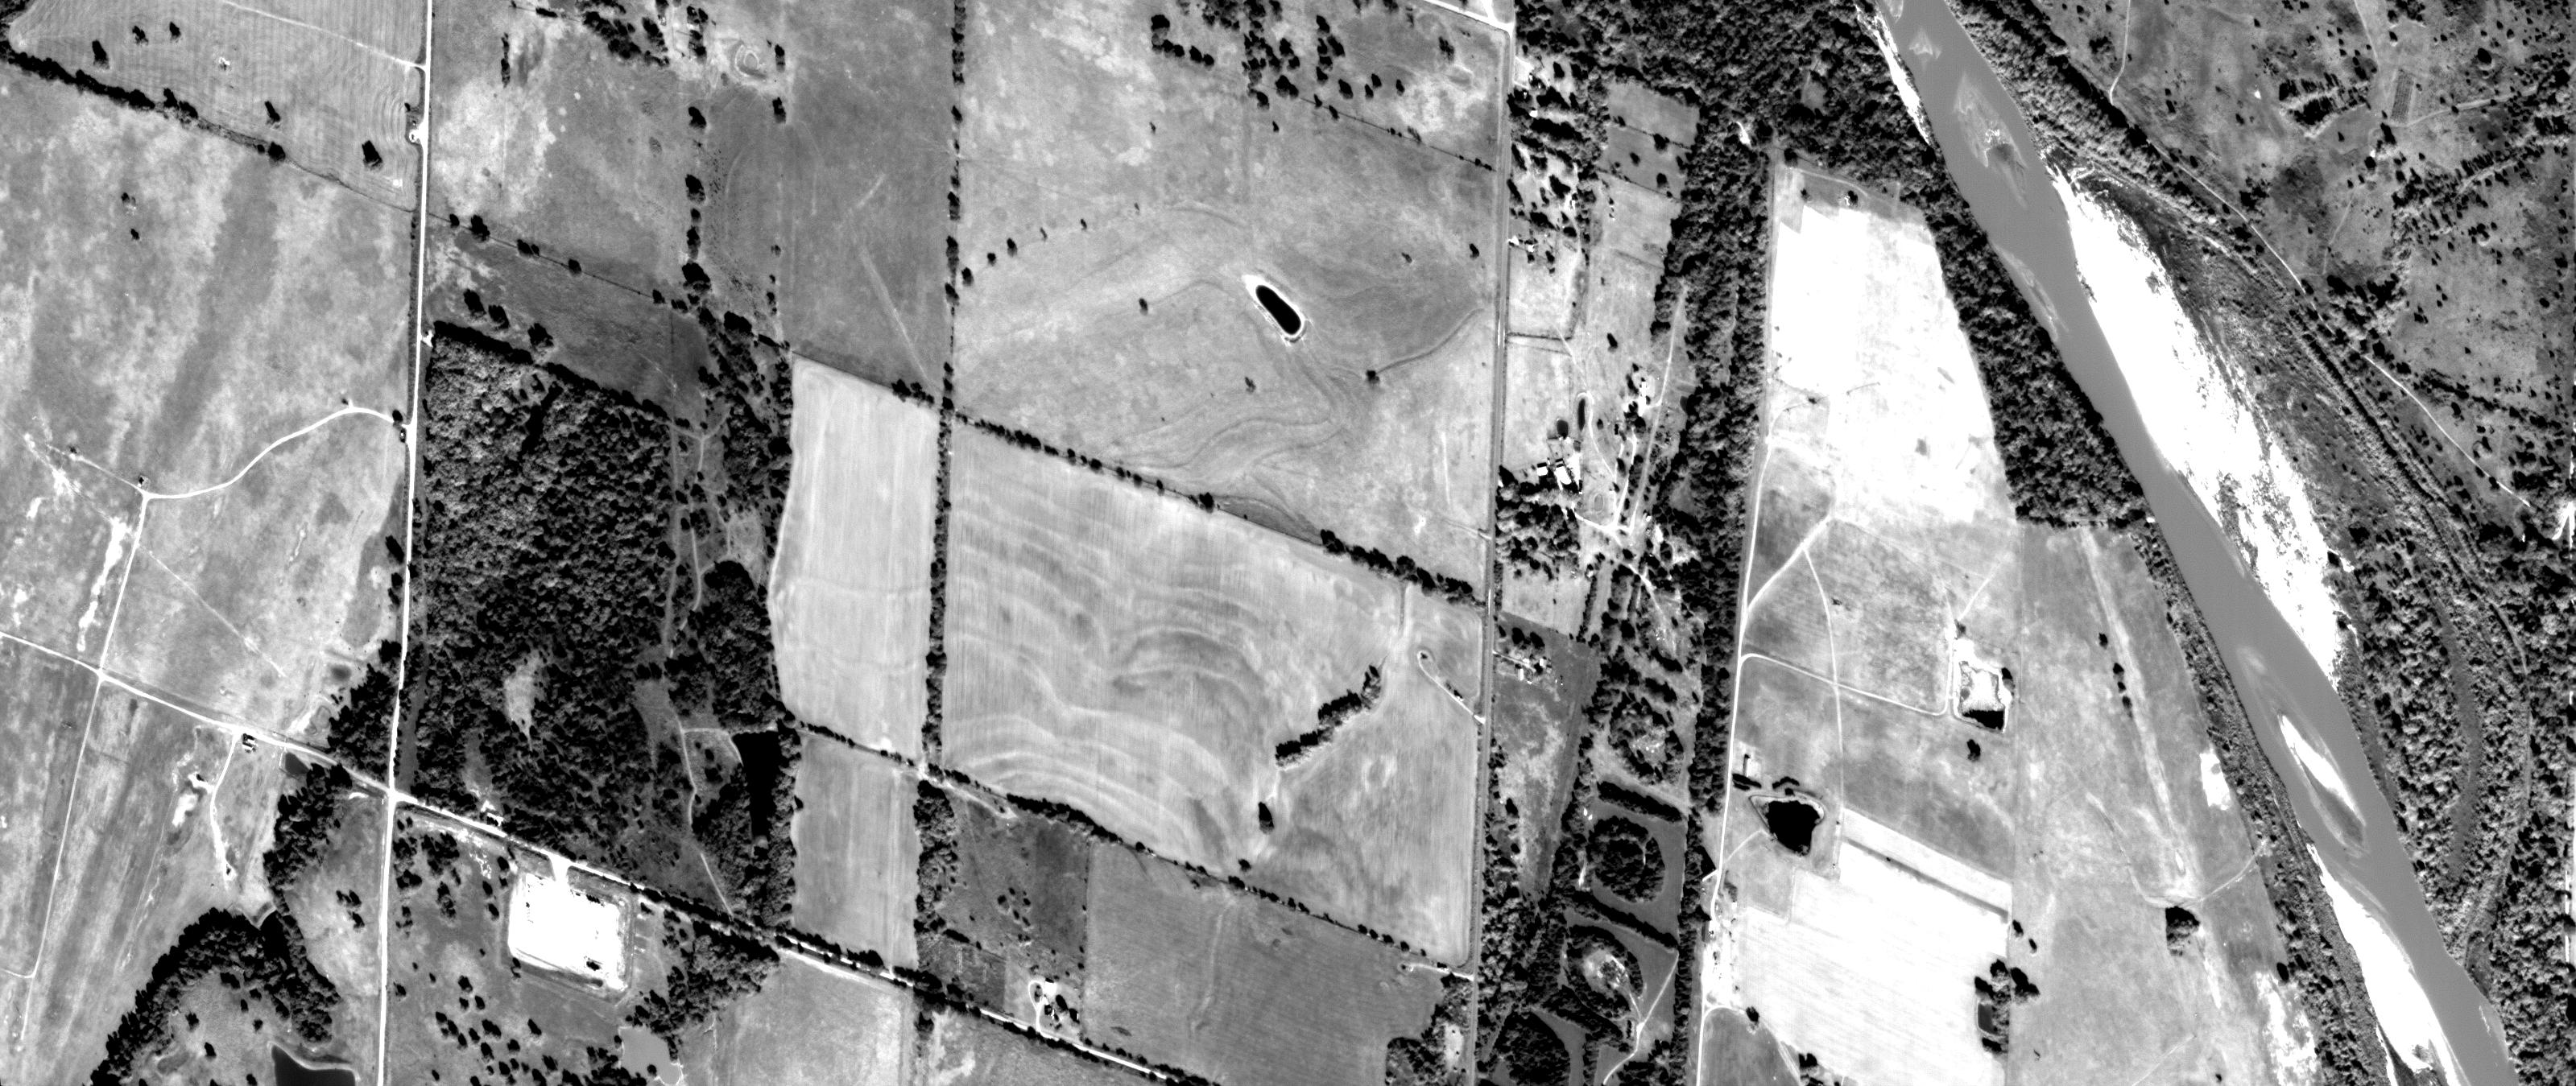
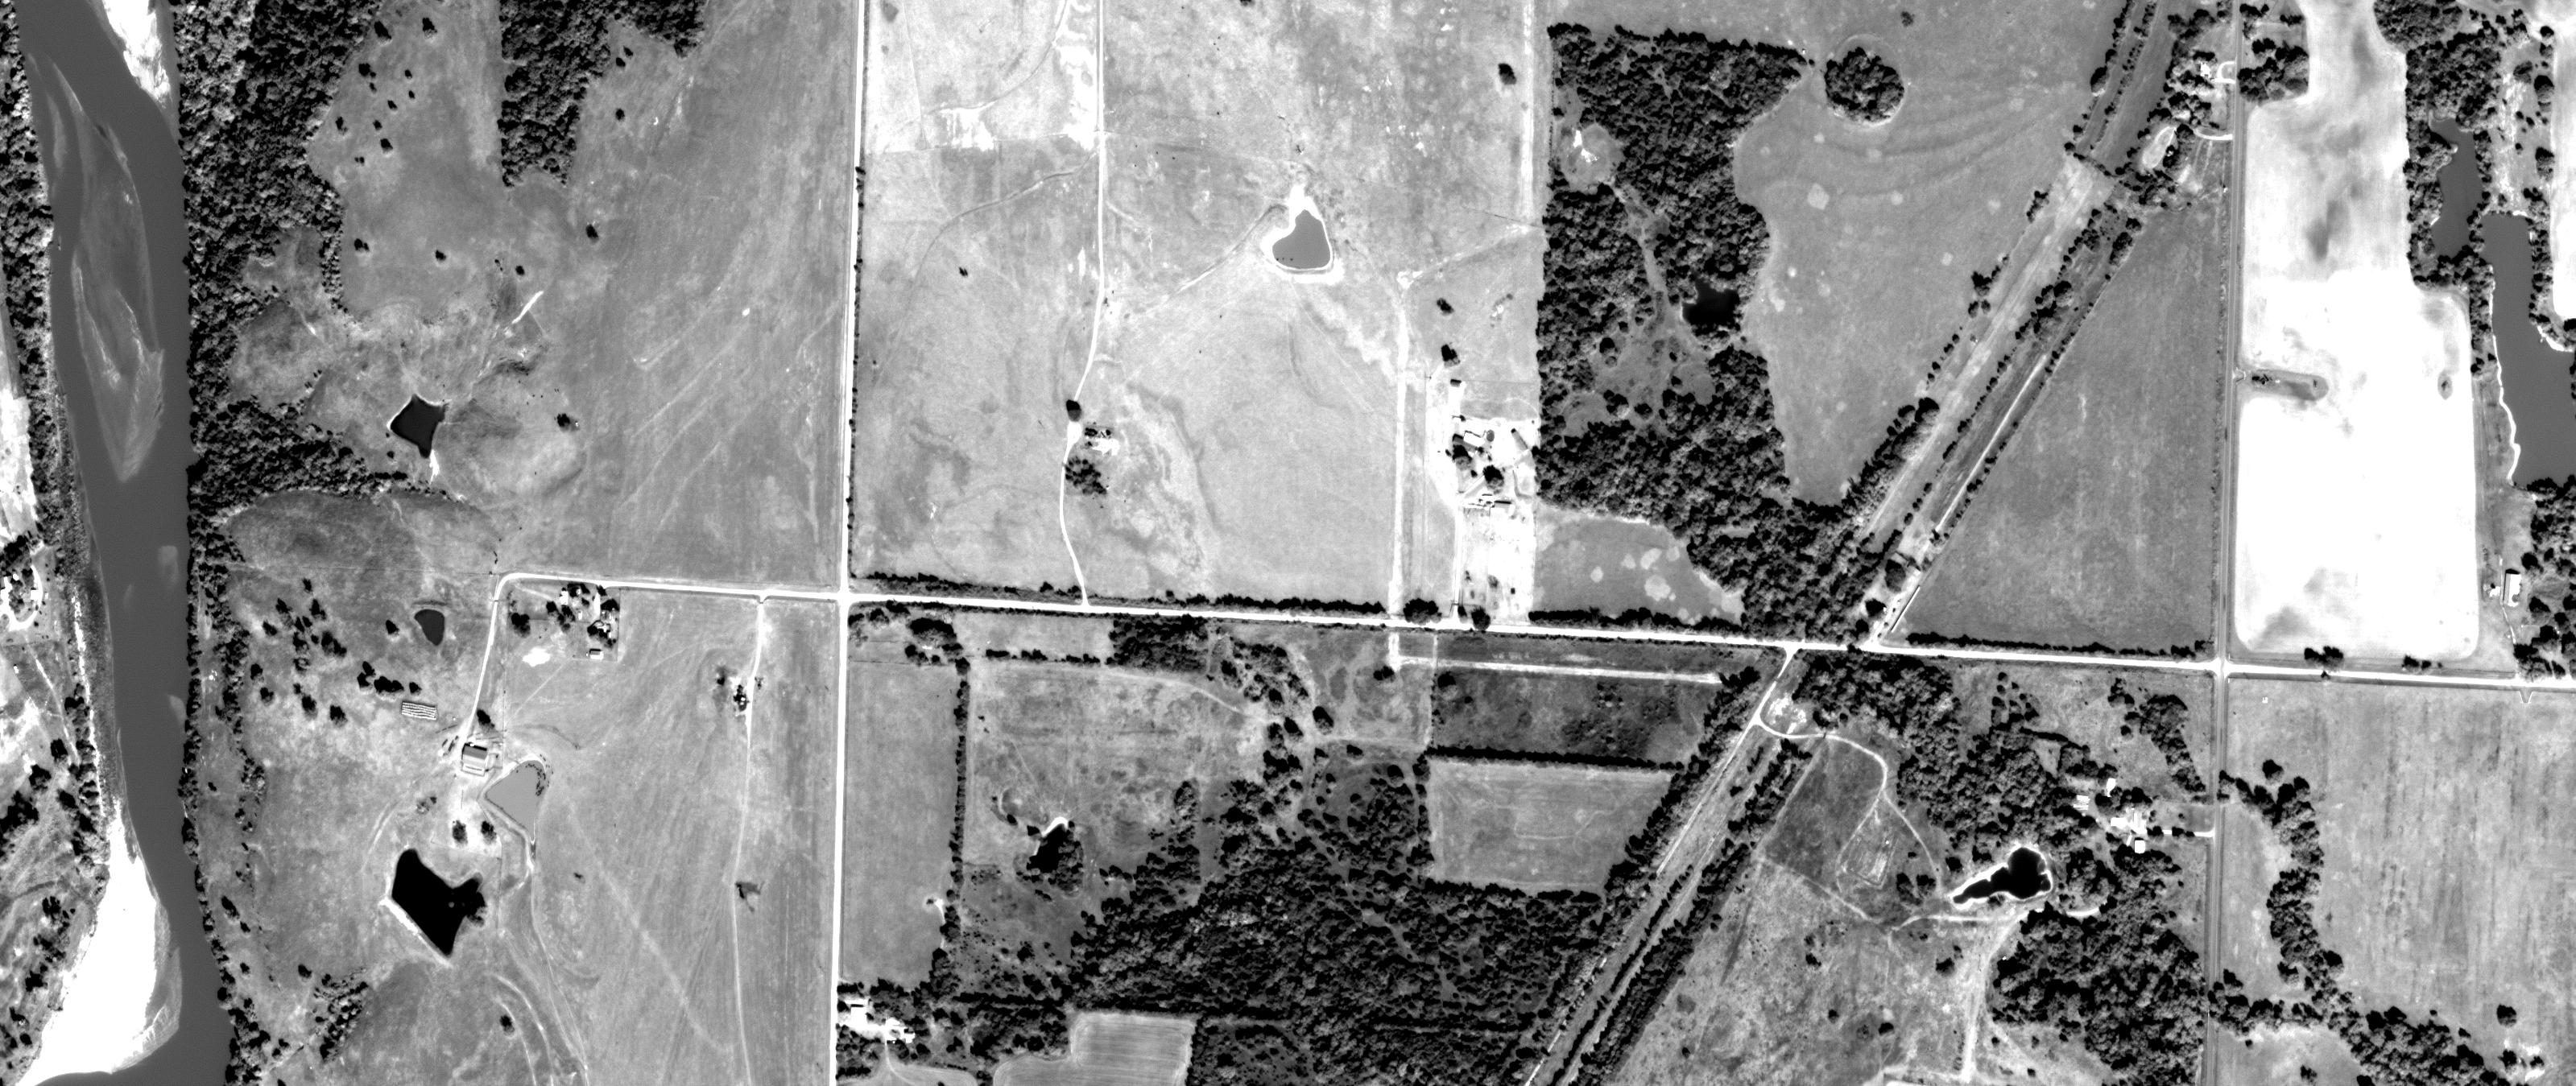
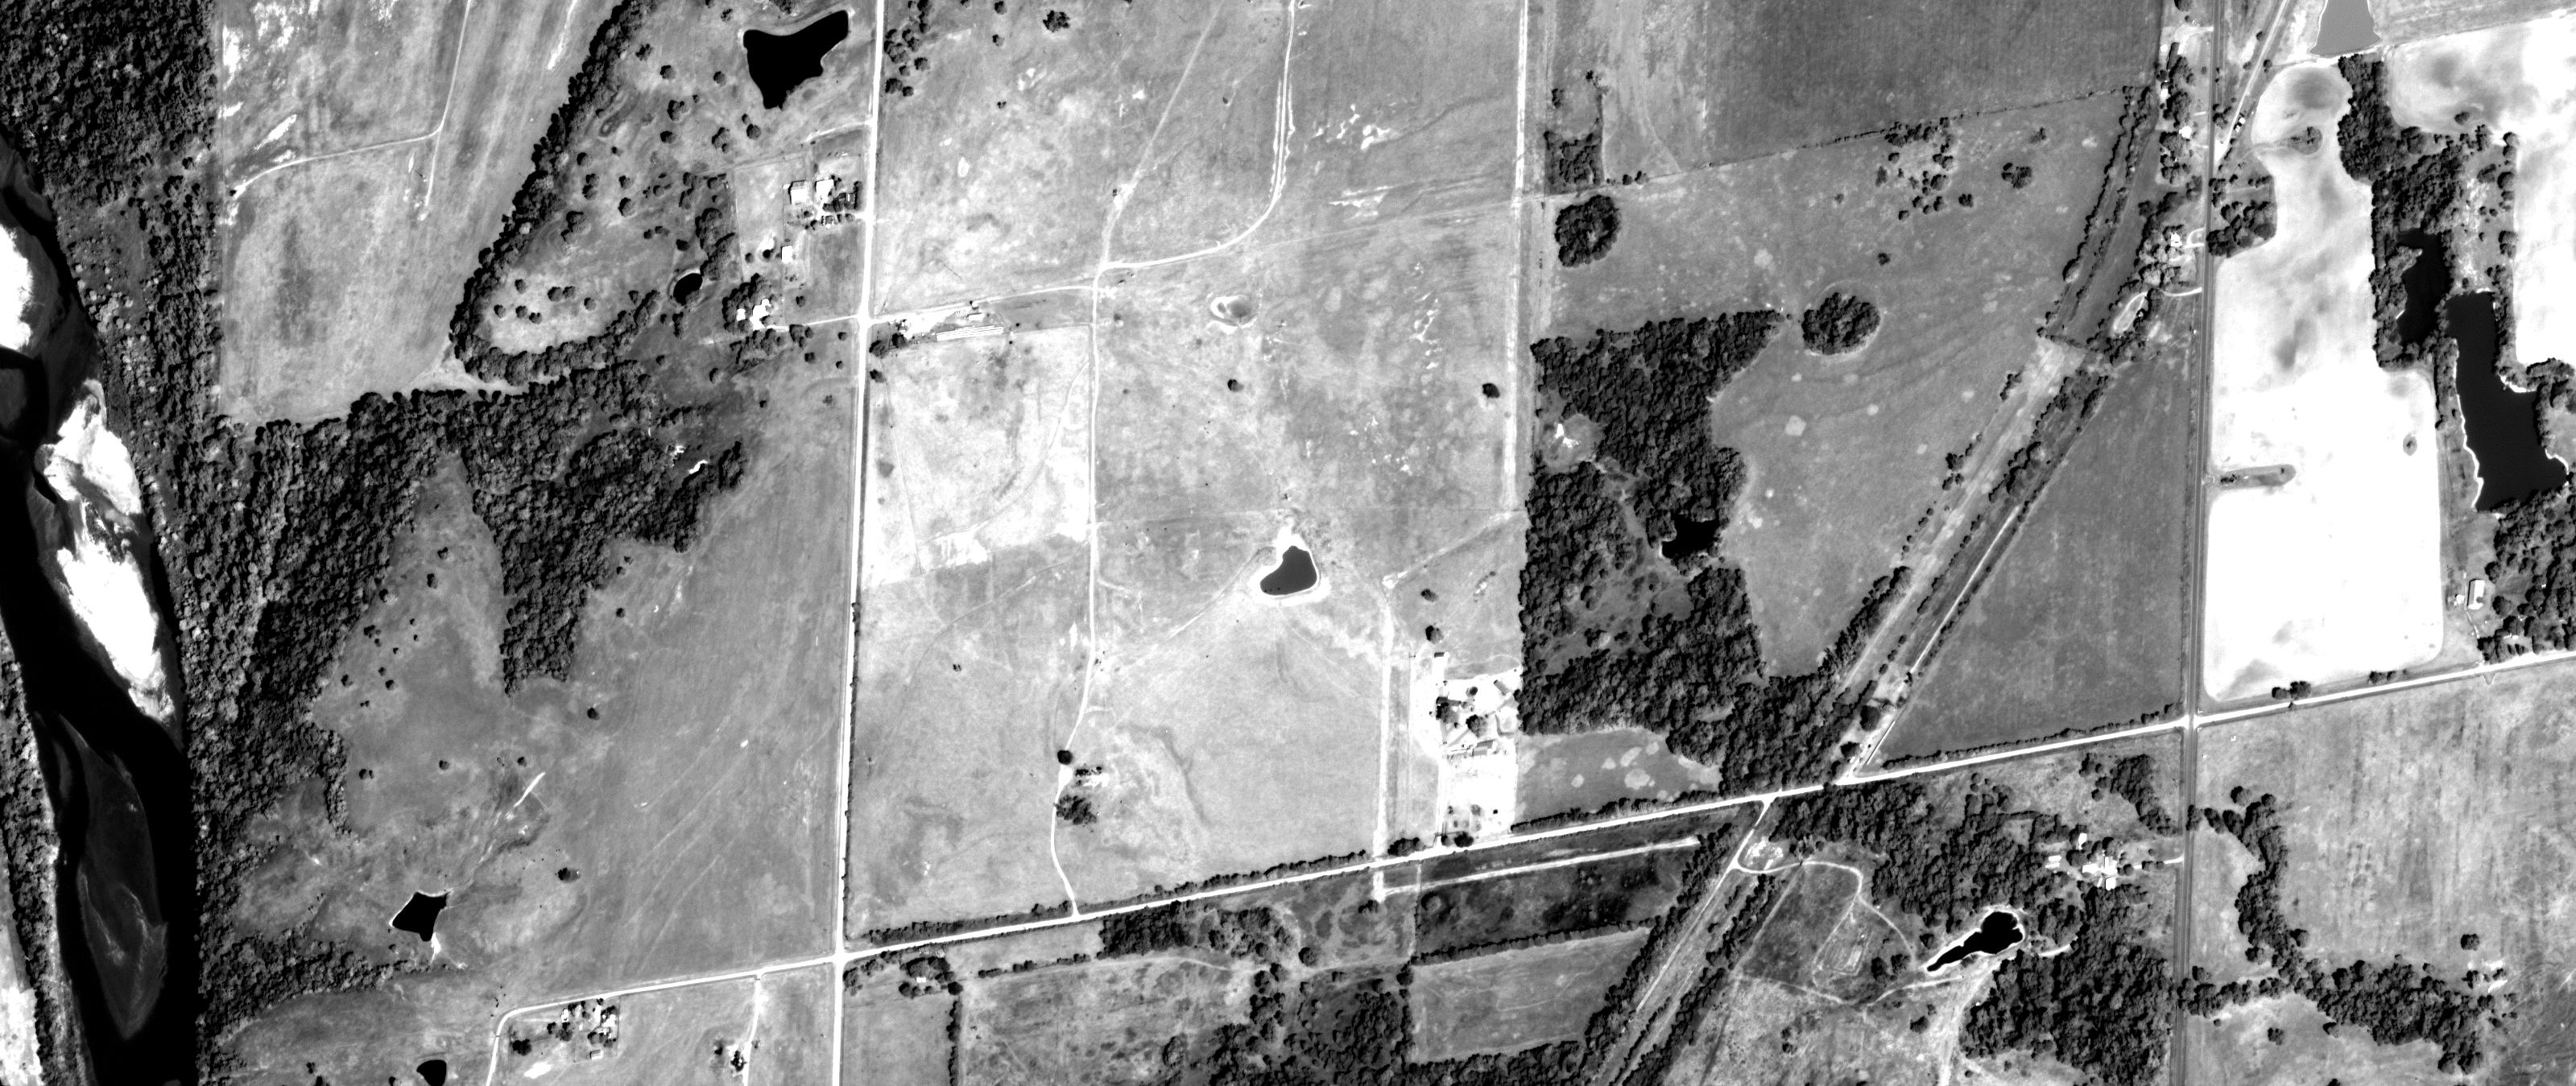

In [27]:
display_triplets(i, folders) #roi)

In [94]:
def workaround_json_int64(o):
    if isinstance(o,np.integer) : return int(o)
    raise TypeError

In [145]:
import json
def write_json(i, folders, indices, roi=None):
    # Get current config file
    with open('config.json', 'r') as f:
        user_cfg = json.load(f)
    user_cfg['out_dir'] = './output'
    # Config path of images and RPC
    images = []
    for j in indices:
        img_dict = {}
        img_name = folders[j][i]
        img_dict['img'] = img_name
        img_dict['rpc'] = '..' + img_name.split('.')[2] + '_rpc.txt'
        images.append(img_dict)
    user_cfg['images'] = images
    # Config ROI 
    if (roi == None):
        user_cfg["full_img"] = True
    else:
        user_cfg["full_img"] = False
        user_cfg["roi"] = roi
    # Modify config file   
    with open('config.json', 'w') as f:
        json.dump(user_cfg, f, indent=2, default=workaround_json_int64)

In [146]:
write_json(0, folders, ['1148' , '1231'], roi)

In [150]:
!rm -rf output

In [113]:
!ls

__pycache__               ipytools2.py              understand_s2p.ipynb
config.json               output
ipytools.py               pointing_error_correction



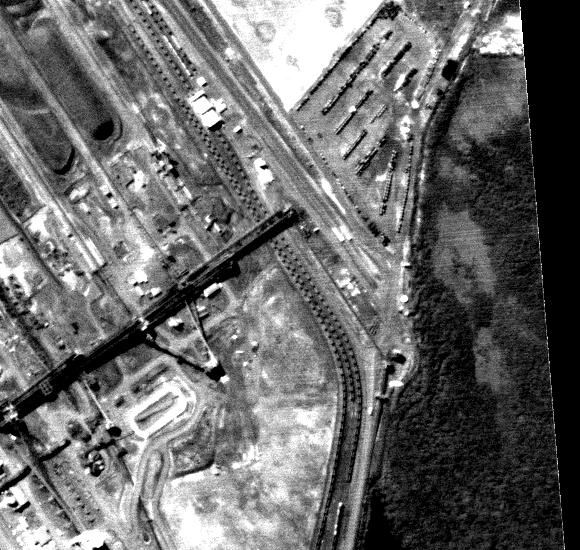
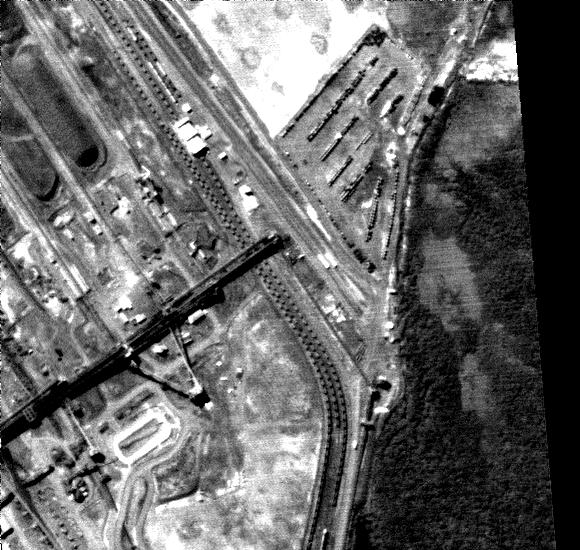

In [38]:
a_ref = './output/s03_20161003T161107Z/tiles/row_0000000_height_500/col_0001000_width_500/pair_1/rectified_ref.tif'
a_sec = './output/s03_20161003T161107Z/tiles/row_0000000_height_500/col_0001000_width_500/pair_1/rectified_sec.tif'
display_gallery([simple_equalization_8bit(readGTIFF(a_ref)), simple_equalization_8bit(readGTIFF(a_sec))])

In [16]:
expected_output = './output/s03_20161003T161107Z/dsm.tif'
a = readGTIFF(expected_output)

<IPython.core.display.Javascript object>


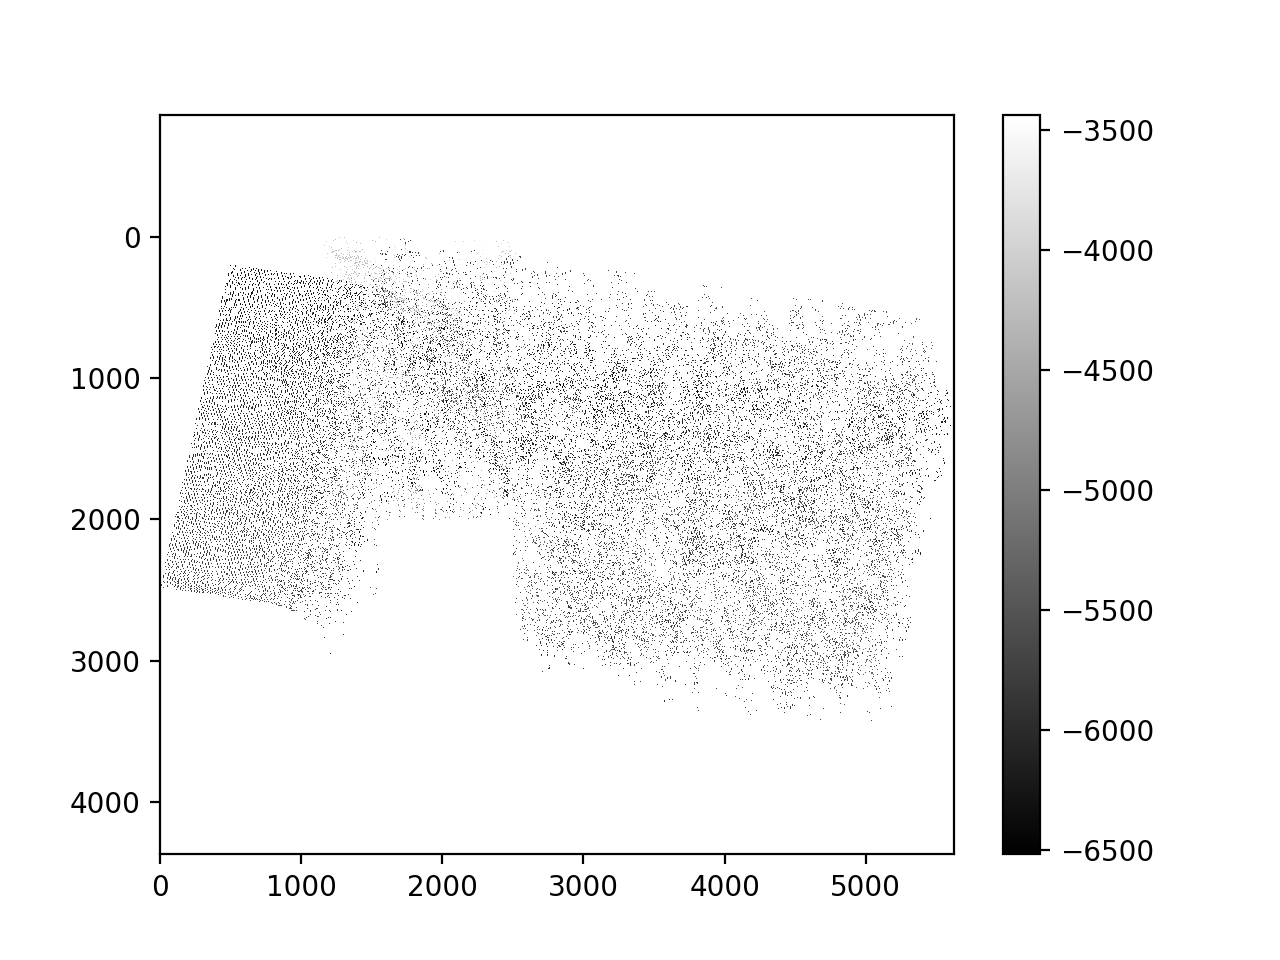

In [18]:
b = a#readGTIFF('/Users/juleskozolinsky/Projets/s2p/yaw_extension/output/s03_20161003T161107Z/tiles/row_0000000_height_500/col_0001000_width_500/dsm.tif')
display_imshow(b)